In [32]:
import pandas as pd
import numpy as np
from numpy import log as ln
import matplotlib.pyplot as plt
import random
def plot_bid_ask(data, ask_list, bid_list):
    x = np.linspace(0., 1, num = data.shape[0])
    fig=plt.figure(figsize=(15,8))  
    plt.subplot(2,1,1) # number of rows, number of  columns, number of the subplot 
    plt.plot(x,data, lw = 1., label = 'S')
    plt.plot(x,ask_list, lw = 1., label = 'Ask')
    plt.plot(x,bid_list, lw = 1., label = 'Bid')       
    plt.grid(True)
    plt.legend(loc=0)
    plt.ylabel('P')
    plt.title('Prices')
    plt.show()

def plot_positions(pos_list):
    x = np.linspace(0., 1, num = pos_list.shape[0])
    plt.figure(figsize=(15, 8))
    plt.subplot(2,1,2)
    plt.plot(x,pos_list, 'g', lw = 1., label = 'q') #plot 2 lines
    plt.grid(True)
    plt.legend(loc=0)
    plt.axis('tight')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.show()
    
    

def analyze_bid_ask(filename, n):
    
    #data = pd.read_csv("cryptodatadownload/" + filename, nrows = n, skiprows = 1, usecols = [6])[::-1].reset_index(drop = True).close
    data = pd.read_csv(filename, nrows = n, skiprows = 1, usecols = [6])[::-1].reset_index(drop = True).close

    vol = np.std(data, ddof = 1) #volatility
    riskav = 0.1 #risk aversion 
    pos = 0 # position
    k = 1.5
    A = 140
    bid_list = np.array([])
    ask_list = np.array([])
    pos_list = np.array([])

    for i in range(len(data)):
        pos_list = np.append(pos_list, pos)

            
        reservation = data[i] - pos * vol * (riskav ** 2)
        spread = vol * (riskav **2) + (2/vol) * ln(1 + (vol/k))
        bid = reservation - spread/2     
        ask = reservation + spread/2
        
        deltaB = data[i] - bid   
        deltaA = ask - data[i]

        lambdaA = A * np.exp(-k * deltaA)
        ProbA = lambdaA * 1/n
        fa = random.random() # Random tikimybe kad uzfillino Ask

        lambdaB = A * np.exp(-k * deltaB)
        ProbB = lambdaB * 1/n
        fb = random.random() # Random tikimybe kad uzfillino Bid

        if ProbB > fb and ProbA < fa : # Tik Bid orderi uzfillino
            pos = pos + 1

        if ProbB < fb and ProbA > fa : # Tik Ask orderi uzfillino
            pos = pos - 1
        
        bid_list, ask_list = np.append(bid_list, bid), np.append(ask_list, ask) 
        
    plot_bid_ask(data, bid_list, ask_list)
    plot_positions(pos_list)

In [13]:
def res(price, vol, pos):
    reservation = price - pos * vol * (0.1 ** 2)
    spread = vol * (0.1 **2) + (2/vol) * ln(1 + (vol/1.5))
    bid = round(reservation - spread/2,2)     
    ask = round(reservation + spread/2,2)
    return bid, ask

In [15]:
res(58240, 140, 0)

(58239.27, 58240.73)

In [37]:
tickers = ['ADA',
 'BTC',
 'NEO',
 'TRX',
 'EOS',
 'XLM',
 'QTUM',
 'XRP',
 'ETH',
 'BNB',
 'LTC',
 'ETC']
n = 100

ADA


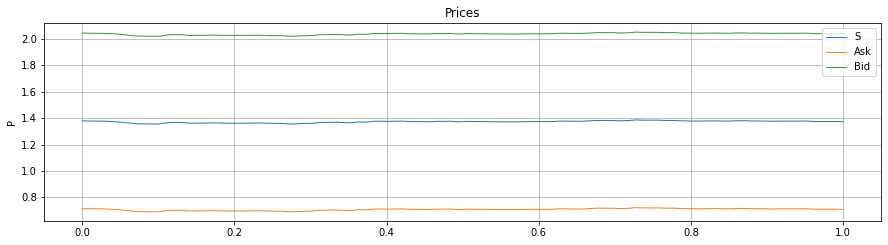

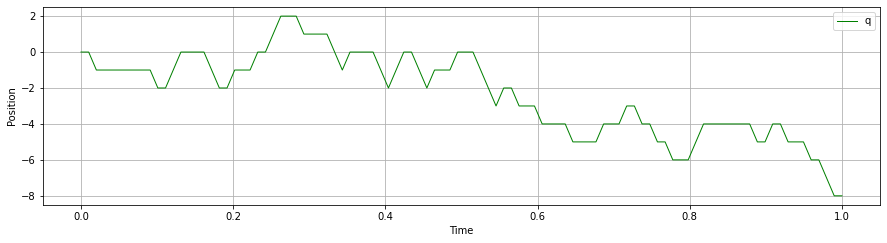

BTC


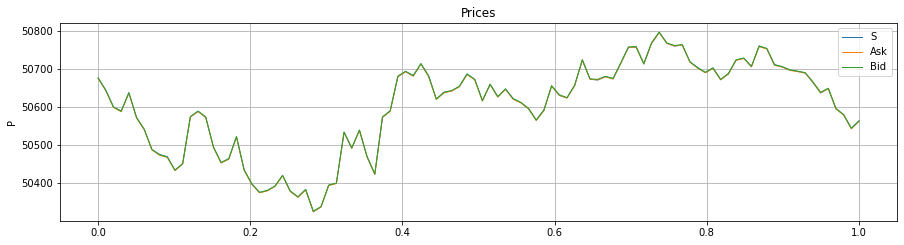

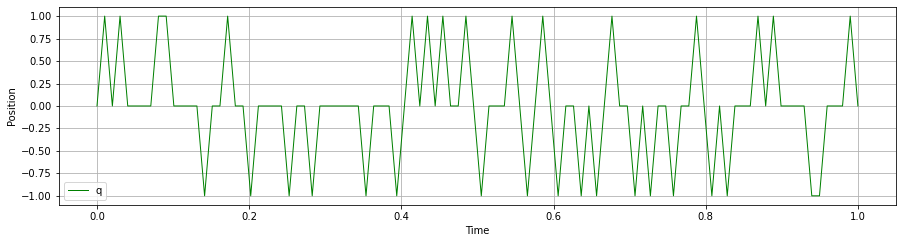

NEO


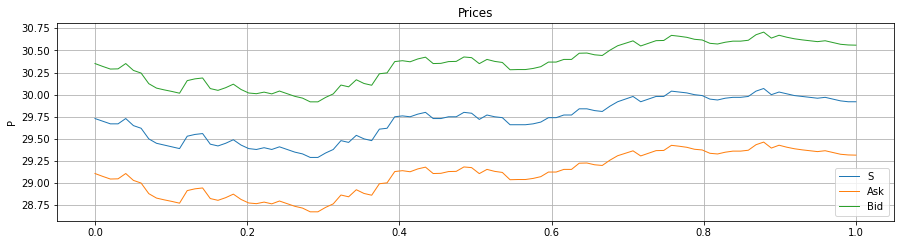

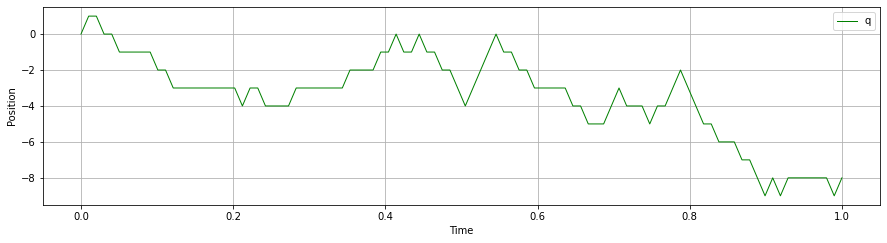

TRX


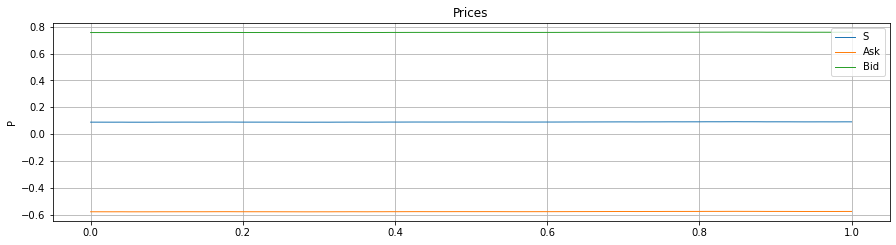

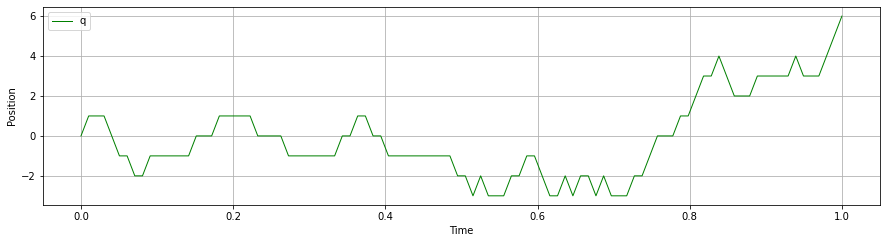

EOS


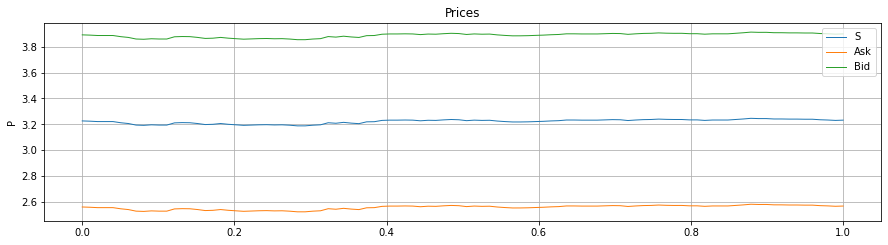

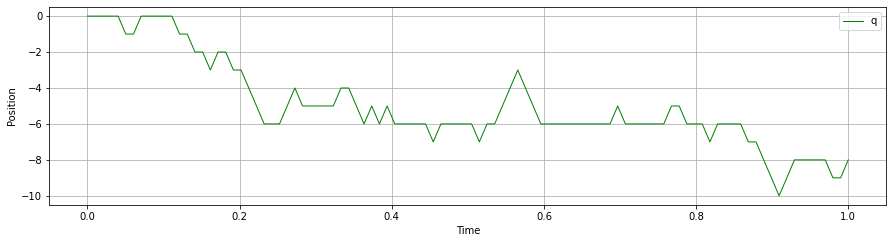

XLM


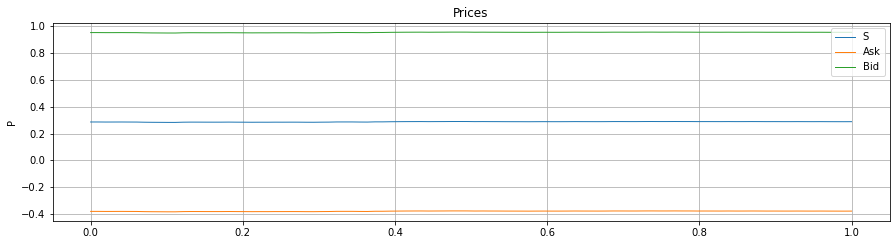

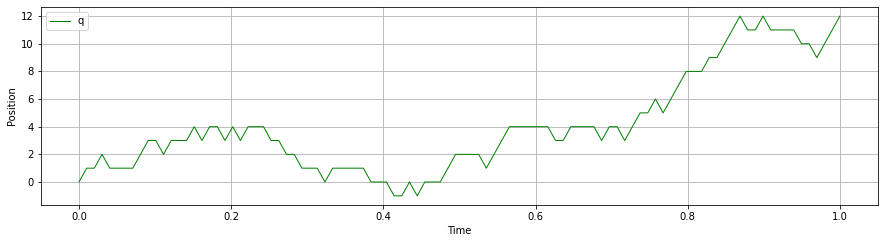

QTUM


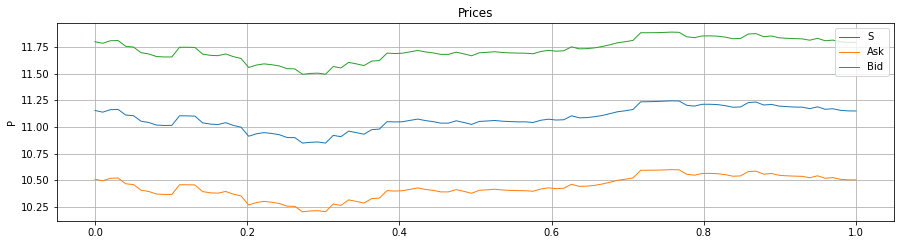

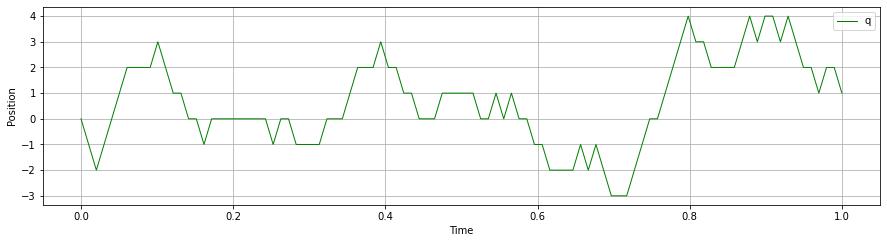

XRP


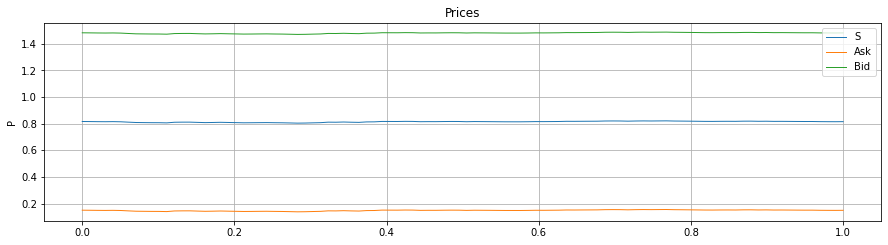

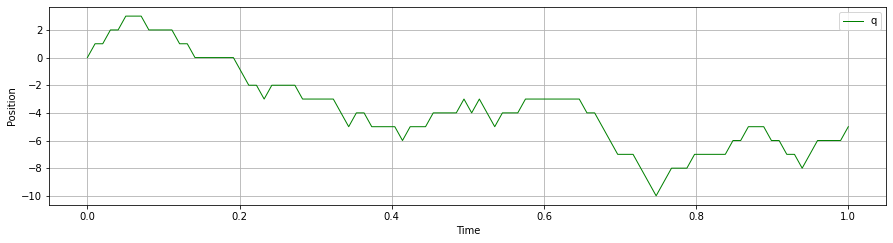

ETH


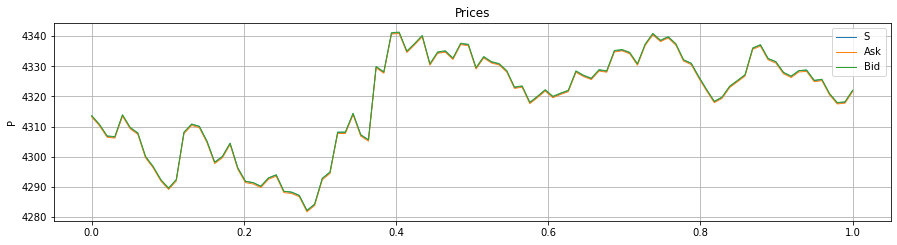

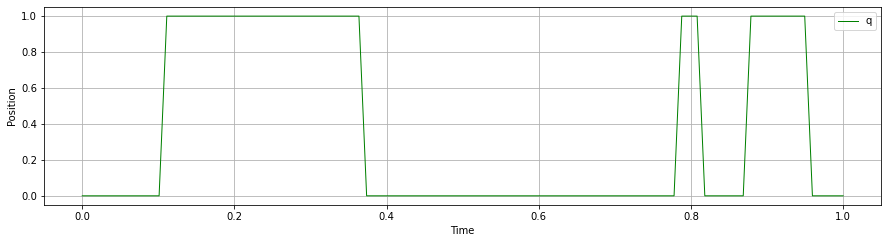

BNB


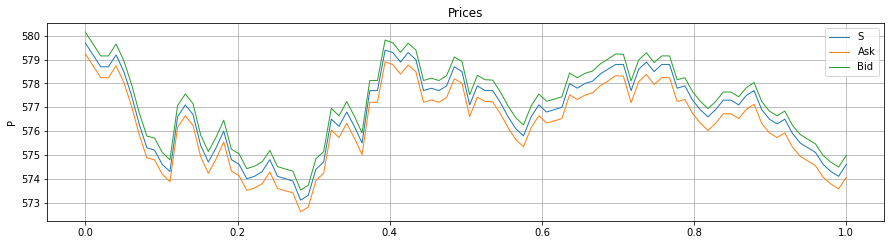

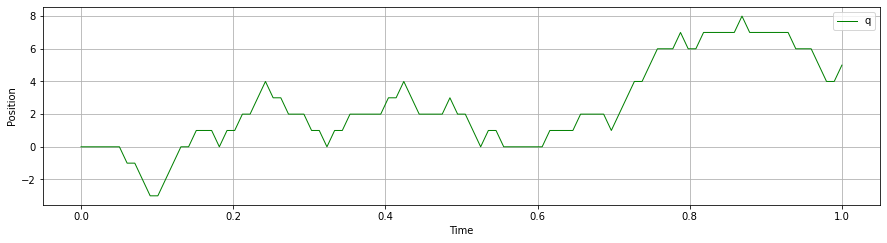

LTC


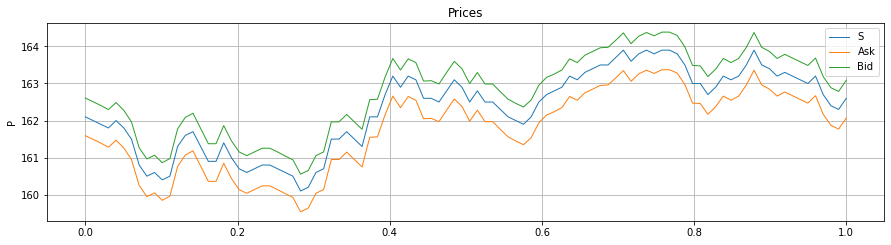

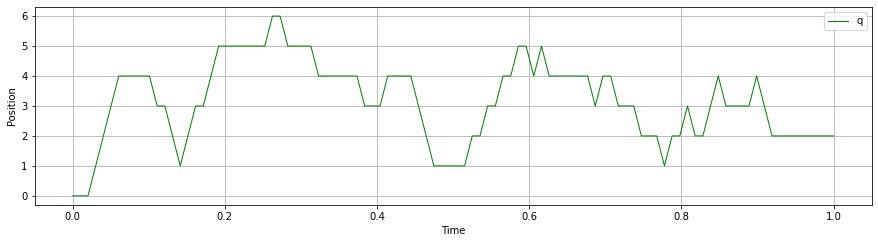

ETC


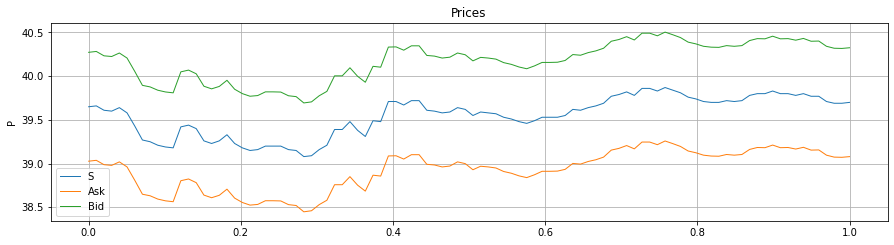

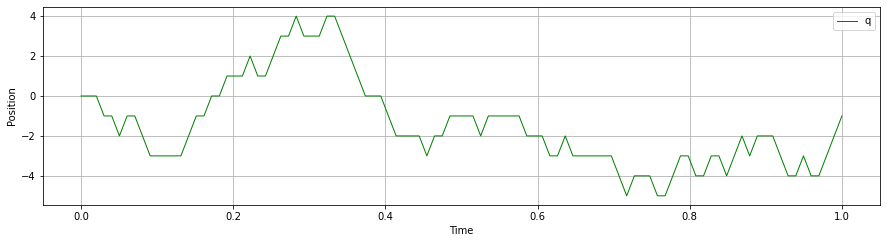

In [38]:
for t in tickers:
    filename = "../Normalization/ZSCORE/minute/Binance_" + t + "USDT_minute.csv"
    print(t)
    analyze_bid_ask(filename, n)
